<a href="https://colab.research.google.com/github/bilalProgTech/online-data-science-ml-challenges/blob/master/Shell-AI-Energy-Hackathon/AI-Computer-Vision-Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://he-public-data.s3.ap-southeast-1.amazonaws.com/shell_dataset.zip
!unzip *.zip

--2021-10-18 17:58:38--  https://he-public-data.s3.ap-southeast-1.amazonaws.com/shell_dataset.zip
Resolving he-public-data.s3.ap-southeast-1.amazonaws.com (he-public-data.s3.ap-southeast-1.amazonaws.com)... 52.219.36.79
Connecting to he-public-data.s3.ap-southeast-1.amazonaws.com (he-public-data.s3.ap-southeast-1.amazonaws.com)|52.219.36.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3467218047 (3.2G) [binary/octet-stream]
Saving to: ‘shell_dataset.zip’

shell_dataset.zip   100%[===================>]   3.23G  14.0MB/s    in 3m 57s  

2021-10-18 18:02:36 (13.9 MB/s) - ‘shell_dataset.zip’ saved [3467218047/3467218047]

Archive:  shell_dataset.zip
   creating: dataset/
  inflating: dataset/test.zip        
  inflating: dataset/train.zip       
  inflating: dataset/test.csv        
  inflating: dataset/readme.txt      
  inflating: dataset/sample_submission.csv  


In [ ]:
!unzip /content/dataset/train.zip
!unzip /content/dataset/test.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/250/200.jpg        
  inflating: test/250/210.jpg        
  inflating: test/250/220.jpg        
  inflating: test/250/230.jpg        
  inflating: test/250/240.jpg        
  inflating: test/250/250.jpg        
  inflating: test/250/260.jpg        
  inflating: test/250/270.jpg        
  inflating: test/250/280.jpg        
  inflating: test/250/290.jpg        
  inflating: test/250/30.jpg         
  inflating: test/250/300.jpg        
  inflating: test/250/310.jpg        
  inflating: test/250/320.jpg        
  inflating: test/250/330.jpg        
  inflating: test/250/340.jpg        
  inflating: test/250/350.jpg        
  inflating: test/250/360.jpg        
  inflating: test/250/40.jpg         
  inflating: test/250/50.jpg         
  inflating: test/250/60.jpg         
  inflating: test/250/70.jpg         
  inflating: test/250/80.jpg         
  inflating: test/250/90.jpg         
  inflating: test/250/weather_data.cs

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('/content/train/train.csv')
train.head(10)

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,1/1,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,-1,9.95,271.3,806.779,0.0,0.219,0.0,0.0
1,1/1,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,-1,8.20,272.9,806.840,0.0,0.206,0.0,0.0
2,1/1,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,-1,6.70,288.8,806.876,0.0,0.148,0.0,0.0
3,1/1,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,-1,7.70,294.0,806.823,0.0,0.235,0.0,0.0
4,1/1,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,-1,7.20,285.5,806.762,0.0,0.182,0.0,0.0
5,1/1,00:05,-0.913492,-0.044510,0.85412,7.309,1.079,-7.221,32.38,-1,7.70,280.8,806.655,0.0,0.116,0.0,0.0
6,1/1,00:06,-0.922662,-0.098911,1.65384,7.219,1.065,-7.335,32.26,-1,7.95,280.2,806.538,0.0,0.182,0.0,0.0
7,1/1,00:07,-0.906123,-0.098910,2.45307,7.237,1.069,-7.331,32.23,-1,6.45,279.7,806.595,0.0,0.153,0.0,0.0
8,1/1,00:08,-0.898426,-0.098910,3.25158,7.211,1.026,-7.274,32.45,-1,8.20,293.6,806.554,0.0,0.225,0.0,0.0
9,1/1,00:09,-0.897701,-0.118692,4.04914,7.222,1.049,-7.251,32.49,-1,8.95,285.8,806.448,0.0,0.141,0.0,0.0


In [ ]:
import os
import cv2

In [ ]:
files = []
cloud_cov = []
for dirname, _, filenames in os.walk('/content/train'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if '.csv' in path:
            print('CSV Detected')
        else:
            image = cv2.imread(path)
            image = cv2.resize(image, (256,256), interpolation= cv2.INTER_LINEAR)
            gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            thresh = cv2.threshold(gray, 175, 255, cv2.THRESH_BINARY)[1]
            white = np.sum(thresh == 255)
            black = np.sum(thresh == 0)
            cloud_percent = round(white/(white+black) * 100)
            files.append(path)
            cloud_cov.append(cloud_percent)

CSV Detected


In [ ]:
train_cloud_df = pd.DataFrame({'Filename': files, 'Cloud_Coverage': cloud_cov})
train_cloud_df.sample(10)

,Filename,Cloud_Coverage
7379,/content/train/0906/0906143000.jpg,12
5323,/content/train/0206/0206120000.jpg,8
20810,/content/train/1123/1123075000.jpg,32
6119,/content/train/0518/0518151000.jpg,20
14872,/content/train/0515/0515165000.jpg,18
20270,/content/train/1029/1029140000.jpg,28
24233,/content/train/0307/0307132000.jpg,22
22144,/content/train/0415/0415102000.jpg,10
24066,/content/train/0621/0621114000.jpg,5
11710,/content/train/0613/0613101000.jpg,6


In [ ]:
train_cloud_df.to_csv('Shell_ai_Cloud.csv', index=False)

In [ ]:
train_cloud_df['Cloud_Coverage'].describe()

count    25251.000000
mean        19.052315
std         10.803116
min          0.000000
25%         11.000000
50%         18.000000
75%         28.500000
max         67.000000
Name: Cloud_Coverage, dtype: float64

In [ ]:
train_cloud_df[train_cloud_df['Cloud_Coverage']==67]

,Filename,Cloud_Coverage
2127,/content/train/0109/0109075000.jpg,67


In [ ]:
train_cloud_df = pd.read_csv('Shell_ai_Cloud.csv')

In [ ]:
train_cloud_df['Datetime'] = train_cloud_df['Filename'].str.split('/').str[4].str.split('.').str[0].str[:8]
train_cloud_df['Datetime'] = train_cloud_df['Datetime'].apply(lambda x: '-'.join(x[i:i+2] for i in range(0, len(x), 2)))
train_cloud_df.sample(20)

,Filename,Cloud_Coverage,Datetime
24366,/content/train/0322/0322061000.jpg,27,03-22-06-10
1609,/content/train/0913/0913071000.jpg,37,09-13-07-10
21778,/content/train/1104/1104164000.jpg,27,11-04-16-40
10911,/content/train/1206/1206102000.jpg,36,12-06-10-20
5095,/content/train/0122/0122081000.jpg,9,01-22-08-10
16924,/content/train/0329/0329140000.jpg,25,03-29-14-00
3208,/content/train/0430/0430094000.jpg,2,04-30-09-40
18782,/content/train/1120/1120102000.jpg,29,11-20-10-20
13034,/content/train/0215/0215075000.jpg,39,02-15-07-50
9246,/content/train/0809/0809123000.jpg,19,08-09-12-30


In [ ]:
train_cloud_df['Cloud_Cov2'] = 100 - train_cloud_df['Cloud_Coverage']
train_cloud_df.sample(20)

,Filename,Cloud_Coverage,Datetime,Cloud_Cov2
20269,/content/train/1029/1029071000.jpg,39,10-29-07-10,61
1284,/content/train/0630/0630072000.jpg,32,06-30-07-20,68
11236,/content/train/0813/0813160000.jpg,8,08-13-16-00,92
8328,/content/train/0612/0612161000.jpg,24,06-12-16-10,76
1710,/content/train/0801/0801064000.jpg,33,08-01-06-40,67
14657,/content/train/0127/0127123000.jpg,14,01-27-12-30,86
19807,/content/train/1208/1208103000.jpg,32,12-08-10-30,68
15308,/content/train/0524/0524180000.jpg,0,05-24-18-00,100
5054,/content/train/1013/1013081000.jpg,31,10-13-08-10,69
13276,/content/train/0209/0209115000.jpg,8,02-09-11-50,92


In [ ]:
train_cloud_df[train_cloud_df['Datetime'].str.len() == 8]

,Filename,Cloud_Coverage,Datetime,Cloud_Cov2
10160,/content/train/0623/062310.jpg,12,06-23-10,88
10551,/content/train/0202/094000.jpg,32,09-40-00,68
10552,/content/train/0202/090000.jpg,36,09-00-00,64
10554,/content/train/0202/083000.jpg,36,08-30-00,64
10558,/content/train/0202/091000.jpg,35,09-10-00,65
10563,/content/train/0202/080000.jpg,38,08-00-00,62
10566,/content/train/0202/082000.jpg,38,08-20-00,62
10571,/content/train/0202/084000.jpg,37,08-40-00,63
10573,/content/train/0202/081000.jpg,39,08-10-00,61
10576,/content/train/0202/074000.jpg,39,07-40-00,61


In [ ]:
train_cloud_df.loc[132:132, 'Datetime'] = train_cloud_df.loc[132:132, 'Datetime'] + '-00'

In [ ]:
train_cloud_df[train_cloud_df['Datetime'].str.len() == 8]

,Filename,Cloud_Coverage,Datetime,Cloud_Cov2
10160,/content/train/0623/062310.jpg,12,06-23-10,88
10551,/content/train/0202/094000.jpg,32,09-40-00,68
10552,/content/train/0202/090000.jpg,36,09-00-00,64
10554,/content/train/0202/083000.jpg,36,08-30-00,64
10558,/content/train/0202/091000.jpg,35,09-10-00,65
10563,/content/train/0202/080000.jpg,38,08-00-00,62
10566,/content/train/0202/082000.jpg,38,08-20-00,62
10571,/content/train/0202/084000.jpg,37,08-40-00,63
10573,/content/train/0202/081000.jpg,39,08-10-00,61
10576,/content/train/0202/074000.jpg,39,07-40-00,61


In [ ]:
dateindexw = train_cloud_df[train_cloud_df['Datetime'].str.len() == 8].index
dateindexw

Int64Index([10160, 10551, 10552, 10554, 10558, 10563, 10566, 10571, 10573,
            10576, 10584, 10586, 10587, 10593, 10597, 10601, 10604, 10606,
            17248, 17249, 17251, 17252, 17254, 17255, 17258, 17264, 17265,
            17279, 17282, 17284, 17285, 17289, 17292, 17299, 17301],
           dtype='int64')

In [ ]:
train_cloud_df.loc[dateindexw[:17], 'Datetime'] = '02-02-' + train_cloud_df.loc[dateindexw[:17], 'Datetime'].str[:5]
train_cloud_df.loc[dateindexw[17:], 'Datetime'] = '12-02-' + train_cloud_df.loc[dateindexw[17:], 'Datetime'].str[:5]
train_cloud_df[train_cloud_df['Datetime'].str.len() == 8]

,Filename,Cloud_Coverage,Datetime,Cloud_Cov2


In [ ]:
train_cloud_df.sample(5)

,Filename,Cloud_Coverage,Datetime,Cloud_Cov2
20417,/content/train/0521/0521161000.jpg,14,05-21-16-10,86
541,/content/train/0213/0213125000.jpg,7,02-13-12-50,93
19599,/content/train/0324/0324083000.jpg,32,03-24-08-30,68
21200,/content/train/0428/0428111000.jpg,16,04-28-11-10,84
13842,/content/train/1212/1212092000.jpg,0,12-12-09-20,100


In [ ]:
train_cloud_df['Datetime'].str[3:5].astype('int64').describe()

count    25251.000000
mean        15.800760
std          8.798795
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: Datetime, dtype: float64

In [ ]:
train_cloud_df['Datetime'] = '2020-' + train_cloud_df['Datetime']

In [ ]:
train_cloud_df.head()

,Filename,Cloud_Coverage,Datetime,Cloud_Cov2
0,/content/train/0221/0221105000.jpg,30,2020-02-21-10-50,70
1,/content/train/0221/0221161000.jpg,31,2020-02-21-16-10,69
2,/content/train/0221/0221081000.jpg,39,2020-02-21-08-10,61
3,/content/train/0221/0221121000.jpg,30,2020-02-21-12-10,70
4,/content/train/0221/0221155000.jpg,30,2020-02-21-15-50,70


In [ ]:
train_cloud_df['Datetime_f'] = pd.to_datetime(train_cloud_df['Datetime'], format='%Y-%m-%d-%H-%M', errors='coerce')
train_cloud_df.head(10)

,Filename,Cloud_Coverage,Datetime,Cloud_Cov2,Datetime_f
0,/content/train/0221/0221105000.jpg,30,2020-02-21-10-50,70,2020-02-21 10:50:00
1,/content/train/0221/0221161000.jpg,31,2020-02-21-16-10,69,2020-02-21 16:10:00
2,/content/train/0221/0221081000.jpg,39,2020-02-21-08-10,61,2020-02-21 08:10:00
3,/content/train/0221/0221121000.jpg,30,2020-02-21-12-10,70,2020-02-21 12:10:00
4,/content/train/0221/0221155000.jpg,30,2020-02-21-15-50,70,2020-02-21 15:50:00
5,/content/train/0221/0221113000.jpg,30,2020-02-21-11-30,70,2020-02-21 11:30:00
6,/content/train/0221/0221133000.jpg,26,2020-02-21-13-30,74,2020-02-21 13:30:00
7,/content/train/0221/0221125000.jpg,30,2020-02-21-12-50,70,2020-02-21 12:50:00
8,/content/train/0221/0221135000.jpg,28,2020-02-21-13-50,72,2020-02-21 13:50:00
9,/content/train/0221/0221122000.jpg,30,2020-02-21-12-20,70,2020-02-21 12:20:00


In [ ]:
train_cloud_df = train_cloud_df.sort_values(['Datetime_f']).reset_index(drop=True)
train_cloud_df.head()

,Filename,Cloud_Coverage,Datetime,Cloud_Cov2,Datetime_f
0,/content/train/0101/0101074000.jpg,22,2020-01-01-07-40,78,2020-01-01 07:40:00
1,/content/train/0101/0101075000.jpg,16,2020-01-01-07-50,84,2020-01-01 07:50:00
2,/content/train/0101/0101080000.jpg,21,2020-01-01-08-00,79,2020-01-01 08:00:00
3,/content/train/0101/0101081000.jpg,21,2020-01-01-08-10,79,2020-01-01 08:10:00
4,/content/train/0101/0101082000.jpg,27,2020-01-01-08-20,73,2020-01-01 08:20:00


In [ ]:
train_cloud_df.shape

(25251, 5)

In [ ]:
train_cloud_df.to_csv('Shell_ai_update.csv')

In [ ]:
train.sample(20)

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
235979,6/12,20:59,-1.365690,-0.306135,317.52947,21.880,11.933,4.543,32.190,-1,3.45,191.20,821.689,0.000,0.834,0.0,0.0000
200492,5/19,05:32,100.963000,488.924000,70.65209,13.720,9.157,5.657,58.170,3,0.00,0.00,815.033,0.000,0.872,0.0,0.3171
218039,5/31,09:59,900.518000,954.993000,115.99919,25.010,14.907,8.847,35.850,11,2.45,129.40,819.216,0.000,1.309,0.0,0.1627
108780,3/16,13:00,882.725000,843.682000,198.95212,13.450,7.348,1.748,44.930,82,6.70,15.15,817.000,0.000,1.003,0.0,0.1814
480964,11/30,00:04,-1.334880,0.192571,10.83312,-1.796,-5.936,-16.236,27.920,-1,1.95,282.70,825.026,0.000,0.424,0.0,0.0000
308429,8/2,04:29,-1.248380,-0.251819,60.80666,16.940,10.852,6.452,49.980,-1,2.20,285.00,821.931,0.000,-0.063,0.0,0.0000
483980,12/2,02:20,-1.137660,-0.676466,72.10489,-6.922,-8.228,-11.128,68.980,-1,2.20,44.99,824.511,0.000,0.333,0.0,0.0000
300129,7/27,10:09,885.088000,931.045000,120.58451,23.340,16.302,12.702,51.220,11,2.95,123.90,823.898,0.000,1.443,0.0,0.1673
290997,7/21,01:57,-1.160960,-0.192568,28.41168,18.650,13.096,9.636,55.740,-1,2.70,309.30,819.851,0.000,0.686,0.0,0.0000
35778,1/25,20:18,-0.923690,-0.197819,274.60233,5.579,-0.462,-9.762,29.180,-1,0.00,0.00,815.755,0.000,0.364,0.0,0.0000


In [ ]:
train['Datetime'] = '2020/' +  train['DATE (MM/DD)'] + ' '+ train['MST']
train['Datetime_f'] = pd.to_datetime(train['Datetime'], format='%Y/%m/%d %H:%M', errors='coerce')
train = train.sort_values(['Datetime_f']).reset_index(drop=True)
train.head(10)

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),Datetime,Datetime_f
0,1/1,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,-1,9.95,271.3,806.779,0.0,0.219,0.0,0.0,2020/1/1 00:00,2020-01-01 00:00:00
1,1/1,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,-1,8.20,272.9,806.840,0.0,0.206,0.0,0.0,2020/1/1 00:01,2020-01-01 00:01:00
2,1/1,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,-1,6.70,288.8,806.876,0.0,0.148,0.0,0.0,2020/1/1 00:02,2020-01-01 00:02:00
3,1/1,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,-1,7.70,294.0,806.823,0.0,0.235,0.0,0.0,2020/1/1 00:03,2020-01-01 00:03:00
4,1/1,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,-1,7.20,285.5,806.762,0.0,0.182,0.0,0.0,2020/1/1 00:04,2020-01-01 00:04:00
5,1/1,00:05,-0.913492,-0.044510,0.85412,7.309,1.079,-7.221,32.38,-1,7.70,280.8,806.655,0.0,0.116,0.0,0.0,2020/1/1 00:05,2020-01-01 00:05:00
6,1/1,00:06,-0.922662,-0.098911,1.65384,7.219,1.065,-7.335,32.26,-1,7.95,280.2,806.538,0.0,0.182,0.0,0.0,2020/1/1 00:06,2020-01-01 00:06:00
7,1/1,00:07,-0.906123,-0.098910,2.45307,7.237,1.069,-7.331,32.23,-1,6.45,279.7,806.595,0.0,0.153,0.0,0.0,2020/1/1 00:07,2020-01-01 00:07:00
8,1/1,00:08,-0.898426,-0.098910,3.25158,7.211,1.026,-7.274,32.45,-1,8.20,293.6,806.554,0.0,0.225,0.0,0.0,2020/1/1 00:08,2020-01-01 00:08:00
9,1/1,00:09,-0.897701,-0.118692,4.04914,7.222,1.049,-7.251,32.49,-1,8.95,285.8,806.448,0.0,0.141,0.0,0.0,2020/1/1 00:09,2020-01-01 00:09:00


In [ ]:
train.columns

Index(['DATE (MM/DD)', 'MST', 'Global CMP22 (vent/cor) [W/m^2]',
       'Direct sNIP [W/m^2]', 'Azimuth Angle [degrees]',
       'Tower Dry Bulb Temp [deg C]', 'Tower Wet Bulb Temp [deg C]',
       'Tower Dew Point Temp [deg C]', 'Tower RH [%]', 'Total Cloud Cover [%]',
       'Peak Wind Speed @ 6ft [m/s]', 'Avg Wind Direction @ 6ft [deg from N]',
       'Station Pressure [mBar]', 'Precipitation (Accumulated) [mm]',
       'Snow Depth [cm]', 'Moisture', 'Albedo (CMP11)', 'Datetime',
       'Datetime_f'],
      dtype='object')

In [ ]:
train_cloud_df.columns

Index(['Filename', 'Cloud_Coverage', 'Datetime', 'Cloud_Cov2', 'Datetime_f'], dtype='object')

In [ ]:
train_ = train[train['Total Cloud Cover [%]']>0]
train_.head()

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),Datetime,Datetime_f
467,1/1,07:47,14.4935,0.079127,123.84491,6.933,1.403,-5.597,38.24,6,0.7,210.3,802.042,0.0,0.032,0.0,0.1951,2020/1/1 07:47,2020-01-01 07:47:00
468,1/1,07:48,16.5178,-0.034618,124.01096,6.793,1.294,-5.606,38.58,8,0.7,232.2,801.948,0.0,0.029,0.0,0.1867,2020/1/1 07:48,2020-01-01 07:48:00
469,1/1,07:49,18.6171,-0.153309,124.17734,6.674,1.260,-5.540,39.12,10,1.7,263.9,801.940,0.0,0.173,0.0,0.1783,2020/1/1 07:49,2020-01-01 07:49:00
470,1/1,07:50,20.5986,-0.143419,124.34405,6.646,1.306,-5.494,39.35,13,2.2,277.5,801.927,0.0,0.144,0.0,0.1758,2020/1/1 07:50,2020-01-01 07:50:00
471,1/1,07:51,22.4362,-0.079128,124.51110,6.676,1.316,-5.384,39.64,15,2.2,233.4,801.829,0.0,0.355,0.0,0.1765,2020/1/1 07:51,2020-01-01 07:51:00


In [ ]:
train_df = pd.merge(train_.drop(['DATE (MM/DD)', 'MST', 'Datetime'], axis=1), 
                    train_cloud_df.drop(['Filename', 'Cloud_Coverage', 'Datetime'], axis=1), on=['Datetime_f'])
train_df = train_df[train_df['Snow Depth [cm]']>0]
train_df.head()

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),Datetime_f,Cloud_Cov2
0,20.5986,-0.143419,124.34405,6.646,1.306,-5.494,39.35,13,2.20,277.5,801.927,0.0,0.144,0.0,0.1758,2020-01-01 07:50:00,84
1,28.8356,0.825900,126.02976,8.660,2.480,-5.120,35.41,25,5.70,267.7,802.093,0.0,0.257,0.0,0.2118,2020-01-01 08:00:00,79
2,44.9636,4.401470,127.75072,9.210,2.811,-4.889,34.80,37,5.45,268.9,802.302,0.0,0.257,0.0,0.2146,2020-01-01 08:10:00,79
3,31.3732,0.583573,129.50890,9.610,3.002,-4.798,34.14,15,8.70,263.5,802.175,0.0,0.230,0.0,0.1984,2020-01-01 08:20:00,73
4,40.3076,1.923790,131.30618,8.930,2.771,-4.629,36.26,18,5.95,289.5,802.631,0.0,0.211,0.0,0.1829,2020-01-01 08:30:00,68


In [ ]:
train_df.columns

Index(['Global CMP22 (vent/cor) [W/m^2]', 'Direct sNIP [W/m^2]',
       'Azimuth Angle [degrees]', 'Tower Dry Bulb Temp [deg C]',
       'Tower Wet Bulb Temp [deg C]', 'Tower Dew Point Temp [deg C]',
       'Tower RH [%]', 'Total Cloud Cover [%]', 'Peak Wind Speed @ 6ft [m/s]',
       'Avg Wind Direction @ 6ft [deg from N]', 'Station Pressure [mBar]',
       'Precipitation (Accumulated) [mm]', 'Snow Depth [cm]', 'Moisture',
       'Albedo (CMP11)', 'Datetime_f', 'Cloud_Cov2'],
      dtype='object')

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([[4,0,0,5,1,0,0]], [[5,5,4,0,0,0,0]])

import numpy as np
 
# initializing points in
# numpy arrays
point1 = np.array((1,1,1,1,1,1,1,1))
point2 = np.array((1,1,1,1,1,1,1,0))
 
# calculating Euclidean distance
# using linalg.norm()
dist = np.linalg.norm(point1 - point2)
 
# printing Euclidean distance
print(dist)

1.0


In [ ]:
np.sqrt(2)
import pandas as pd

In [ ]:
pd.DataFrame({'X':[3,5,2,9,1,17,12,4], 'Y':[12,7,3,17,1,4,20,3]}).corr()

,X,Y
X,1.000000,0.384714
Y,0.384714,1.000000


In [ ]:
783/857,857/783,783/2088

(0.9136522753792299, 1.0945083014048531, 0.375)

In [ ]:
70/106

0.660377358490566

In [ ]:
np.corrcoef([2], [1])

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


array([[nan, nan],
       [nan, nan]])

In [ ]:

X = train_df.drop(['Datetime_f', 'Cloud_Cov2', 'Total Cloud Cover [%]'], axis=1)
y = train_df['Total Cloud Cover [%]'].reset_index(drop=True)

X.shape, y.shape

((20143, 14), (20143,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [ ]:
X.head()

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,20.5986,-0.143419,124.34405,6.646,1.306,-5.494,39.35,2.20,277.5,801.927,0.0,0.144,0.0,0.1758
1,28.8356,0.825900,126.02976,8.660,2.480,-5.120,35.41,5.70,267.7,802.093,0.0,0.257,0.0,0.2118
2,44.9636,4.401470,127.75072,9.210,2.811,-4.889,34.80,5.45,268.9,802.302,0.0,0.257,0.0,0.2146
3,31.3732,0.583573,129.50890,9.610,3.002,-4.798,34.14,8.70,263.5,802.175,0.0,0.230,0.0,0.1984
4,40.3076,1.923790,131.30618,8.930,2.771,-4.629,36.26,5.95,289.5,802.631,0.0,0.211,0.0,0.1829


In [ ]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X.values, y.values, eval_set=[(x_train.values,y_train.values),(x_val.values, y_val.values)],
          early_stopping_rounds=200,
          eval_metric='rmse',
          verbose=200)

[19:11:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:54.294	validation_1-rmse:53.9696
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 200 rounds.
[99]	validation_0-rmse:14.3123	validation_1-rmse:14.1681


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(x_val.values)
100 - mean_absolute_error(y_pred, y_val)

88.92436517058664

In [ ]:
from sklearn.model_selection import KFold

fold = KFold(n_splits=15, shuffle=True)
i = 1

models = []
for train_index, test_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    m = LGBMRegressor(boosting_type='gbdt',
                       max_depth=5,
                       learning_rate=0.05,
                       n_estimators=5000,
                       min_child_weight=0.01,
                       colsample_bytree=0.5,
                       random_state=1994)
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          eval_metric='rmse',
          verbose=200)
    pred_y = m.predict(x_val)
    models.append(m)
    print("err_lgm: ",mean_absolute_error(pred_y, y_val))
    i = i + 1

In [ ]:
mean_test_list = []
for folder_num in range(1, 301):
    test = pd.read_csv('/content/test/'+str(folder_num)+'/weather_data.csv')
    X_test = test.drop(['Time [Mins]', 'Total Cloud Cover [%]'], axis=1)
    #X_test = scaler.transform(X_test)
    '''y_pred_tot_lgm  = []
    for model in models:
        y_pred_tot_lgm.append(model.predict(X_test))'''
    '''test['Pred'] = model.predict(X_test.drop(['Tower Dry Bulb Temp [deg C]',
                                              'Tower Wet Bulb Temp [deg C]',
                                              'Tower Dew Point Temp [deg C]',
                                              'Tower RH [%]'], axis=1).values)'''
    
    test['Pred'] = model.predict(X_test.values)
    #test['Pred'] = np.mean(y_pred_tot_lgm, 0)
    test_weather_dict = {}
    for horizon in [30, 60, 90, 120]:
        means = []
        for i in range(0, len(test), horizon):
            means.append(test.loc[i:i+horizon]['Pred'].mean())
        test_weather_dict.update({
            str(horizon)+'_min_horizon': np.mean(means)
        })

    mean_test_list.append(test_weather_dict)

In [ ]:
submission = pd.DataFrame(mean_test_list)
submission.head()

,30_min_horizon,60_min_horizon,90_min_horizon,120_min_horizon
0,90.806044,90.675397,90.523694,90.445303
1,36.664861,38.143503,39.507852,40.626624
2,89.082119,89.341310,89.587254,89.771572
3,46.504123,48.593388,50.416856,51.934758
4,20.403857,20.342516,20.165424,20.333054


In [ ]:
submission['30_min_horizon'] = np.where(submission['30_min_horizon']>100, 100, submission['30_min_horizon'])
submission['60_min_horizon'] = np.where(submission['60_min_horizon']>100, 100, submission['60_min_horizon'])
submission['90_min_horizon'] = np.where(submission['90_min_horizon']>100, 100, submission['90_min_horizon'])
submission['120_min_horizon'] = np.where(submission['120_min_horizon']>100, 100, submission['120_min_horizon'])
submission.head()

,30_min_horizon,60_min_horizon,90_min_horizon,120_min_horizon
0,97.595387,97.251278,96.942496,96.662510
1,47.800990,48.857071,49.886596,50.690614
2,77.988261,77.809022,77.663060,77.489311
3,39.219105,41.119272,42.788772,44.174730
4,23.499132,22.912771,22.340505,22.077853


In [ ]:
submission.shape

(300, 4)

In [ ]:
test_submit = pd.read_csv('/content/dataset/test.csv')
test_submit.head()

,scenario_set,30_min_horizon,60_min_horizon,90_min_horizon,120_min_horizon
0,1,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN


In [ ]:
submission.insert(0, 'scenario_set', test_submit.scenario_set)
submission.head()


,scenario_set,30_min_horizon,60_min_horizon,90_min_horizon,120_min_horizon
0,1,97.595387,97.251278,96.942496,96.662510
1,2,47.800990,48.857071,49.886596,50.690614
2,3,77.988261,77.809022,77.663060,77.489311
3,4,39.219105,41.119272,42.788772,44.174730
4,5,23.499132,22.912771,22.340505,22.077853


In [ ]:
submission.to_csv('Submission_11.csv', index=False)

In [ ]:
submission.shape

(300, 5)

In [ ]:
files = []
cloud_cov = []
for dirname, _, filenames in os.walk('/content/test'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if '.csv' in path:
            print('CSV Detected')
        else:
            image = cv2.imread(path)
            image = cv2.resize(image, (256,256), interpolation= cv2.INTER_LINEAR)
            gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            thresh = cv2.threshold(gray, 175, 255, cv2.THRESH_BINARY)[1]
            white = np.sum(thresh == 255)
            black = np.sum(thresh == 0)
            cloud_percent = round(white/(white+black) * 100)
            files.append(path)
            cloud_cov.append(cloud_percent)

CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected
CSV Detected

In [ ]:
test_cloud_df = pd.DataFrame({'Filename': files, 'Cloud_Coverage': cloud_cov})
test_cloud_df.sample(10)

,Filename,Cloud_Coverage
10285,/content/test/203/210.jpg,19
3256,/content/test/273/290.jpg,7
5193,/content/test/113/150.jpg,17
10829,/content/test/146/110.jpg,10
4405,/content/test/139/150.jpg,10
9574,/content/test/281/200.jpg,23
7828,/content/test/296/140.jpg,33
9628,/content/test/169/290.jpg,11
3402,/content/test/272/130.jpg,12
346,/content/test/251/240.jpg,25


In [ ]:
test_cloud_df['Pred'] = 100 - test_cloud_df['Cloud_Coverage']
test_cloud_df.sample(5)

,Filename,Cloud_Coverage,Pred
1645,/content/test/243/0.jpg,39,61
3504,/content/test/226/300.jpg,13,87
8394,/content/test/88/350.jpg,8,92
906,/content/test/122/160.jpg,15,85
6413,/content/test/294/130.jpg,19,81


In [ ]:
test_cloud_df['Folder_Num'] = test_cloud_df['Filename'].str.split('/').str[3].astype('int64')
test_cloud_df['File_Num'] = test_cloud_df['Filename'].str.split('/').str[4].str.split('.').str[0].astype('int64')
test_cloud_df = test_cloud_df.sort_values(['Folder_Num', 'File_Num']).reset_index(drop=True)
test_cloud_df.head(10)

,Filename,Cloud_Coverage,Pred,Folder_Num,File_Num
0,/content/test/1/0.jpg,6,94,1,0
1,/content/test/1/10.jpg,4,96,1,10
2,/content/test/1/20.jpg,4,96,1,20
3,/content/test/1/30.jpg,4,96,1,30
4,/content/test/1/40.jpg,4,96,1,40
5,/content/test/1/50.jpg,2,98,1,50
6,/content/test/1/60.jpg,8,92,1,60
7,/content/test/1/70.jpg,9,91,1,70
8,/content/test/1/80.jpg,8,92,1,80
9,/content/test/1/90.jpg,7,93,1,90


In [ ]:
mean_test_list = []
for folder_num in range(1, test_cloud_df.Folder_Num.max()+1):
    test = test_cloud_df[test_cloud_df['Folder_Num']==folder_num].reset_index(drop=True)
    print(test.Folder_Num.unique())
    test_weather_dict = {}
    for horizon in [30, 60, 90, 120]:
        means = []
        for i in range(0, len(test), horizon):
            means.append(test.loc[i:i+horizon]['Pred'].mean())
        test_weather_dict.update({
            str(horizon)+'_min_horizon': np.mean(means)
        })

    mean_test_list.append(test_weather_dict)

[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[67]
[68]
[69]
[70]
[71]
[72]
[73]
[74]
[75]
[76]
[77]
[78]
[79]
[80]
[81]
[82]
[83]
[84]
[85]
[86]
[87]
[88]
[89]
[90]
[91]
[92]
[93]
[94]
[95]
[96]
[97]
[98]
[99]
[100]
[101]
[102]
[103]
[104]
[105]
[106]
[107]
[108]
[109]
[110]
[111]
[112]
[113]
[114]
[115]
[116]
[117]
[118]
[119]
[120]
[121]
[122]
[123]
[124]
[125]
[126]
[127]
[128]
[129]
[130]
[131]
[132]
[133]
[134]
[135]
[136]
[137]
[138]
[139]
[140]
[141]
[142]
[143]
[144]
[145]
[146]
[147]
[148]
[149]
[150]
[151]
[152]
[153]
[154]
[155]
[156]
[157]
[158]
[159]
[160]
[161]
[162]
[163]
[164]
[165]
[166]
[167]
[168]
[169]
[170]
[171]
[172]
[173]
[174]
[175]
[176]
[177]
[178]
[179]
[180]
[181]
[182]
[183]
[184]
[185

In [ ]:
submission = pd.DataFrame(mean_test_list)
submission.head() 

,30_min_horizon,60_min_horizon,90_min_horizon,120_min_horizon
0,95.158986,94.432432,94.432432,94.432432
1,79.866359,79.459459,79.459459,79.459459
2,97.686636,96.216216,96.216216,96.216216
3,85.156682,84.135135,84.135135,84.135135
4,74.147465,72.594595,72.594595,72.594595


In [ ]:
submission.insert(0, 'scenario_set', test_submit.scenario_set)
submission.head()

,scenario_set,30_min_horizon,60_min_horizon,90_min_horizon,120_min_horizon
0,1,95.158986,94.432432,94.432432,94.432432
1,2,79.866359,79.459459,79.459459,79.459459
2,3,97.686636,96.216216,96.216216,96.216216
3,4,85.156682,84.135135,84.135135,84.135135
4,5,74.147465,72.594595,72.594595,72.594595


In [ ]:
submission.to_csv('Submission_4.csv', index=False)

In [ ]:
submission.shape

(300, 5)

In [ ]:
submission.tail()

,scenario_set,30_min_horizon,60_min_horizon,90_min_horizon,120_min_horizon
288,289,77.416774,77.486239,77.290562,77.817355
289,290,80.117921,79.915908,80.067537,79.682966
290,291,76.970674,77.066373,77.612388,76.643564
291,292,78.381720,78.684426,77.984375,77.984375
292,293,78.814815,78.814815,78.814815,78.814815


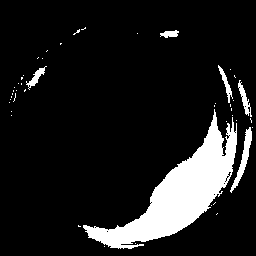

In [ ]:
image=cv2.imread('/content/train/0201/0201150000.jpg')
# convert to HSV and extract saturation channel
image = cv2.resize(image, (256,256), interpolation= cv2.INTER_LINEAR)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# threshold
thresh = cv2.threshold(gray, 175, 255, cv2.THRESH_BINARY)[1]
# count number of white pixels
white = np.sum(thresh == 255)
black = np.sum(thresh == 0)
cv2_imshow(thresh)

In [ ]:
test_99 = pd.read_csv('/content/test/99/weather_data.csv')
test_99.head(10)

,Time [Mins],Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,0,6.45991,11.0671,59.99664,17.81,8.747,0.647,31.39,-1,1.45,300.3,814.029,0.0,0.269,0.0,0.0000
1,1,7.66398,27.6530,60.15561,17.99,8.888,0.688,31.13,-1,1.95,307.4,814.025,0.0,0.163,0.0,0.0000
2,2,9.12829,49.2908,60.31430,18.15,8.804,0.404,30.19,-1,2.20,295.0,814.028,0.0,0.301,0.0,0.0000
3,3,10.62910,69.0759,60.47272,18.42,9.017,0.537,29.97,-1,2.20,288.0,814.024,0.0,0.124,0.0,0.0000
4,4,12.00530,84.2316,60.63088,18.51,9.191,0.911,30.62,-1,2.20,290.8,814.026,0.0,-0.024,0.0,0.0000
5,5,13.63730,105.3740,60.78876,18.42,9.070,0.670,30.26,-1,2.70,285.0,814.008,0.0,0.123,0.0,0.4786
6,6,14.99070,117.6000,60.94638,18.47,9.161,0.881,30.63,-1,2.95,280.3,814.012,0.0,0.008,0.0,0.4778
7,7,16.32720,128.6580,61.10374,18.44,9.123,0.923,30.78,-1,3.20,284.6,814.005,0.0,0.072,0.0,0.4780
8,8,17.72110,139.7640,61.26084,18.38,9.067,0.767,30.55,-1,3.70,274.5,813.995,0.0,0.195,0.0,0.4777
9,9,19.29320,152.9980,61.41768,18.55,8.994,0.394,29.42,-1,2.95,278.3,813.995,0.0,0.213,0.0,0.5003


In [ ]:
test_99.shape

(361, 16)

In [ ]:
import cv2
import os

In [ ]:
from google.colab.patches import cv2_imshow

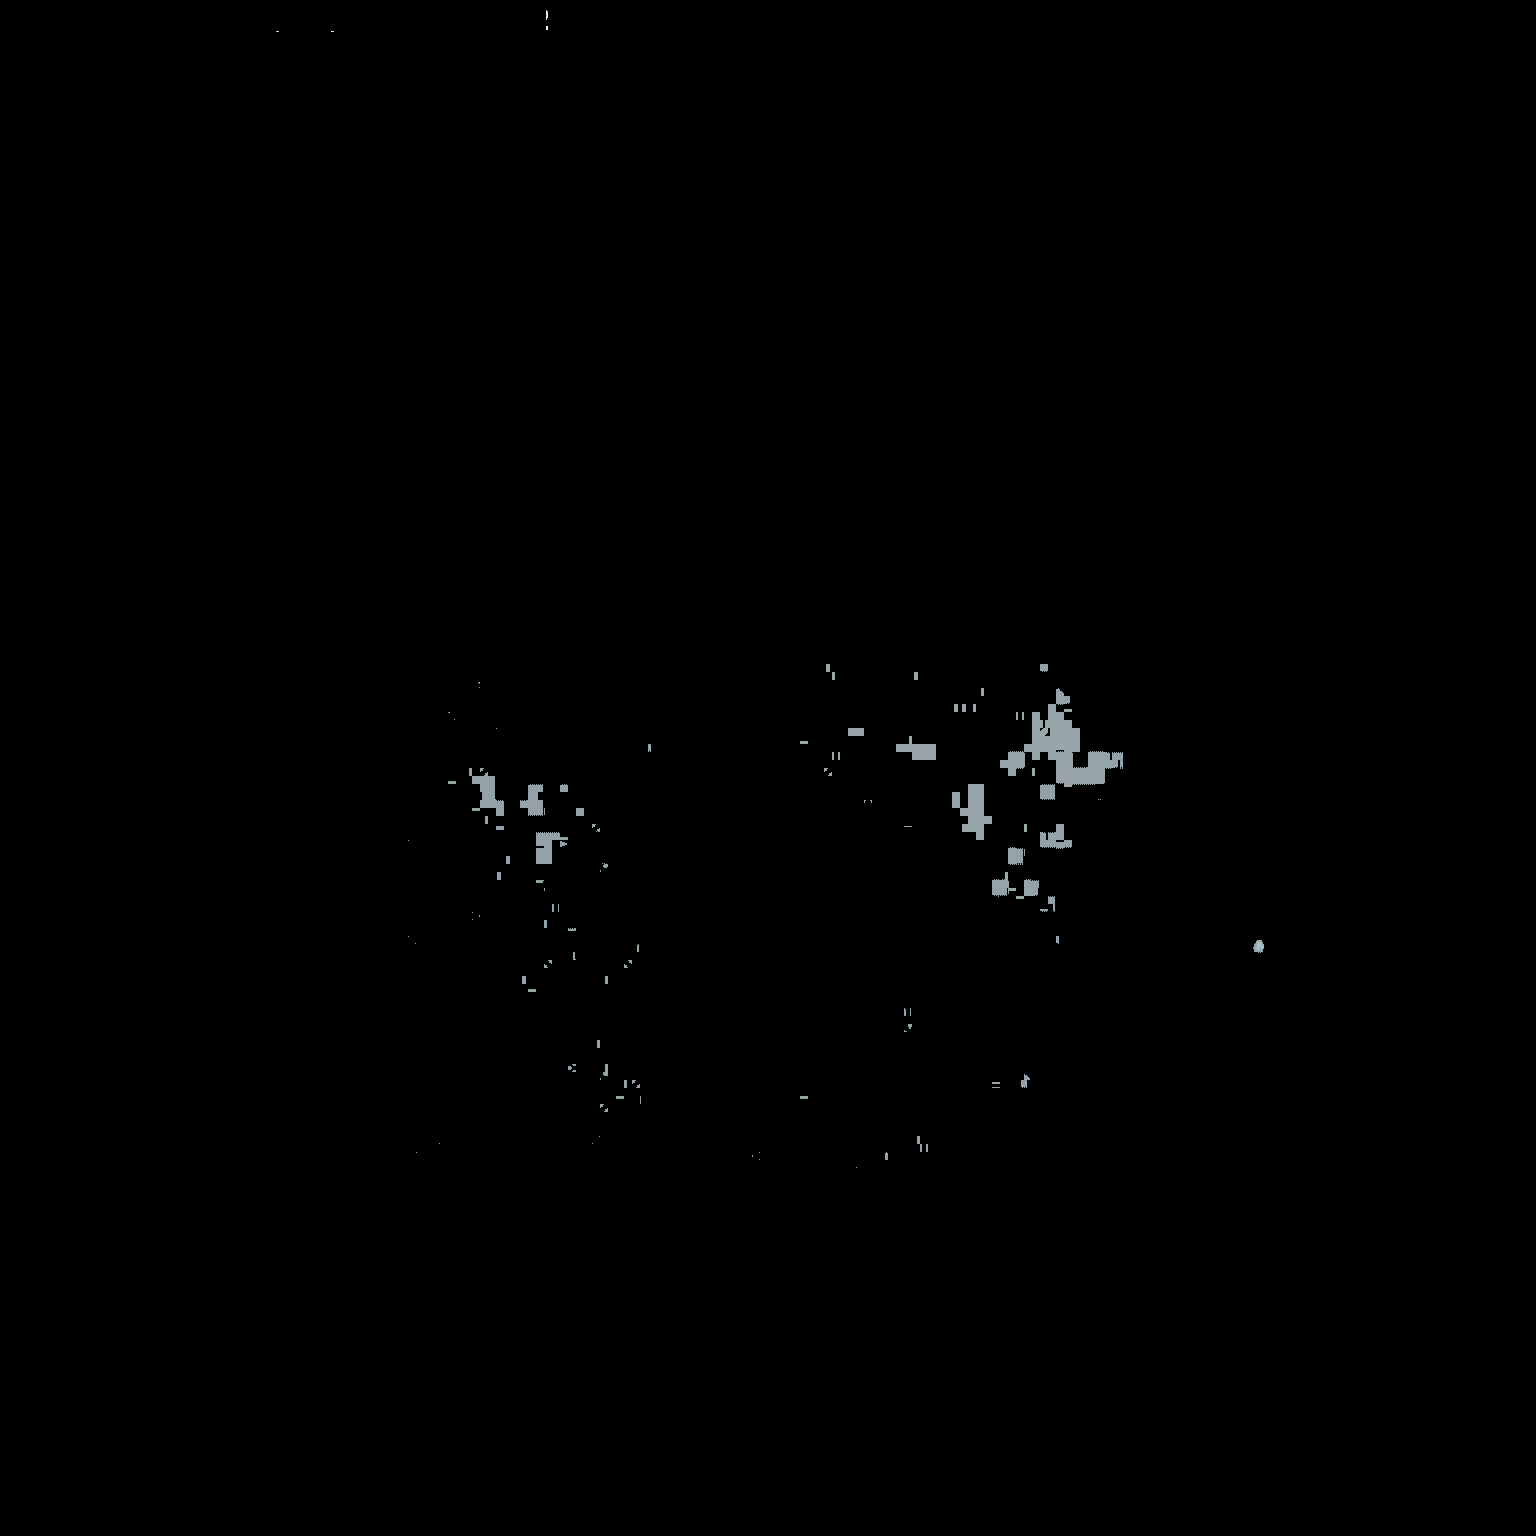

In [ ]:
image=cv2.imread('/content/test/1/360.jpg')
result = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower = np.array([0,0,168])
upper = np.array([172,111,255])
mask = cv2.inRange(image, lower, upper)
result = cv2.bitwise_and(result, result, mask=mask)
#cv2.imshow('mask', mask)
cv2_imshow(result)

In [ ]:
927935502/(927935502 + 2693583858)

0.25622823178832876

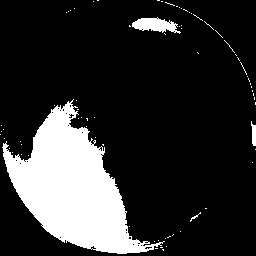

18
11923 53613


In [ ]:
image=cv2.imread('/content/test/10/110.jpg')
# convert to HSV and extract saturation channel
image = cv2.resize(image, (256,256), interpolation= cv2.INTER_LINEAR)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# threshold
thresh = cv2.threshold(gray, 175, 255, cv2.THRESH_BINARY)[1]
# count number of white pixels
white = np.sum(thresh == 255)
black = np.sum(thresh == 0)
cv2_imshow(thresh)
cloud_percent = round(white/(white+black) * 100)
print(cloud_percent)
print(str(white)+' '+str(black))

In [ ]:
num_white

0

In [ ]:
np.unique(thresh)

In [ ]:
for dirname, _, filenames in os.walk('/content/test/1'):
    for filename in filenames:
      if '.csv' in filename:
          print('Done!')
      else:
          print(os.path.join(dirname, filename))
          image=cv2.imread(os.path.join(dirname, filename))
          image = cv2.resize(image, (256,256), interpolation= cv2.INTER_LINEAR)
          # convert to HSV and extract saturation channel
          gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

          # threshold
          thresh = cv2.threshold(gray, 175, 255, cv2.THRESH_BINARY)[1]
          cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
          cnts = cnts[0] if len(cnts) == 2 else cnts[1]

          area = 0
          for c in cnts:
              area += cv2.contourArea(c)
              cv2.drawContours(image,[c], 0, (0,0,0), 2)

          print(area)

/content/test/1/260.jpg
1333.0
/content/test/1/270.jpg
226.0
/content/test/1/200.jpg
5337.0
/content/test/1/90.jpg
4545.5
/content/test/1/120.jpg
5117.5
/content/test/1/150.jpg
3119.5
/content/test/1/320.jpg
4519.0
/content/test/1/10.jpg
2694.5
/content/test/1/350.jpg
60.0
/content/test/1/190.jpg
3995.5
/content/test/1/170.jpg
7381.0
Done!
/content/test/1/310.jpg
4492.0
/content/test/1/20.jpg
2680.0
/content/test/1/80.jpg
4775.5
/content/test/1/360.jpg
0.0
/content/test/1/220.jpg
2797.5
/content/test/1/230.jpg
2814.5
/content/test/1/240.jpg
2195.5
/content/test/1/100.jpg
4952.5
/content/test/1/250.jpg
2586.5
/content/test/1/290.jpg
4389.0
/content/test/1/30.jpg
2660.5
/content/test/1/180.jpg
5132.0
/content/test/1/130.jpg
4132.0
/content/test/1/300.jpg
3245.0
/content/test/1/40.jpg
2362.5
/content/test/1/0.jpg
4035.0
/content/test/1/160.jpg
4097.0
/content/test/1/60.jpg
5125.5
/content/test/1/70.jpg
5463.5
/content/test/1/140.jpg
4110.0
/content/test/1/210.jpg
4063.0
/content/test/1/50

/content/test/1/260.jpg
1417 64119
2


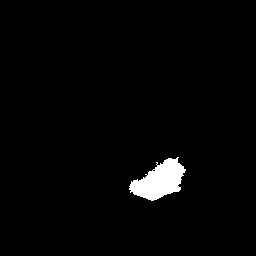

/content/test/1/270.jpg
336 65200
1


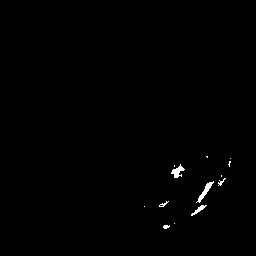

/content/test/1/200.jpg
5446 60090
8


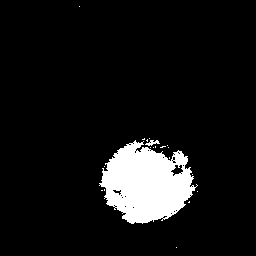

/content/test/1/90.jpg
4723 60813
7


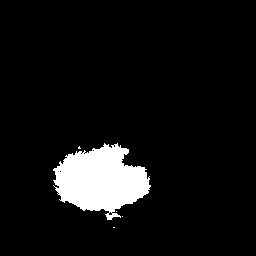

/content/test/1/120.jpg
5283 60253
8


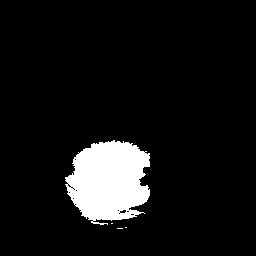

/content/test/1/150.jpg
3547 61989
5


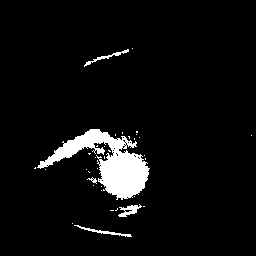

/content/test/1/320.jpg
4648 60888
7


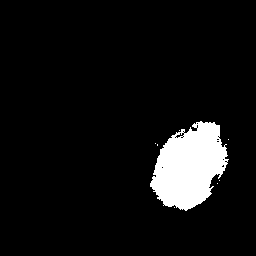

/content/test/1/10.jpg
2832 62704
4


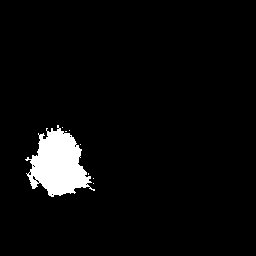

/content/test/1/350.jpg
78 65458
0


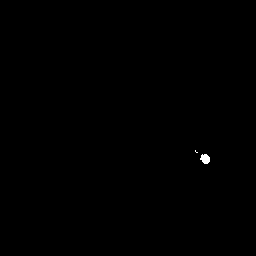

/content/test/1/190.jpg
4253 61283
6


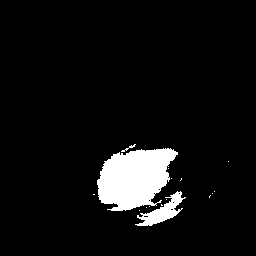

/content/test/1/170.jpg
8077 57459
12


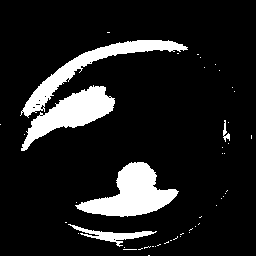

Done!
/content/test/1/310.jpg
4621 60915
7


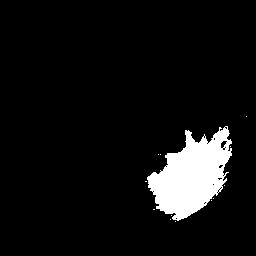

/content/test/1/20.jpg
2888 62648
4


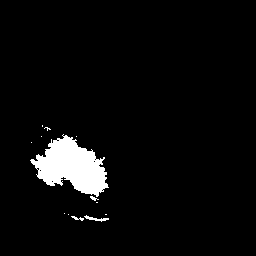

/content/test/1/80.jpg
4954 60582
8


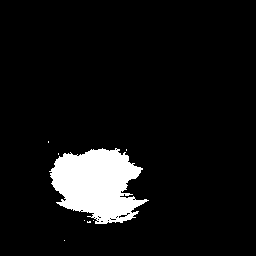

/content/test/1/360.jpg
1 65535
0


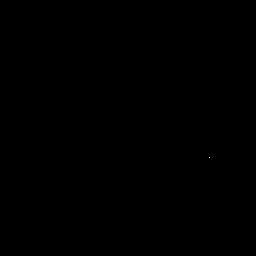

/content/test/1/220.jpg
2861 62675
4


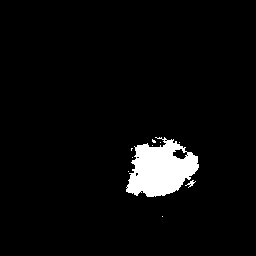

/content/test/1/230.jpg
3008 62528
5


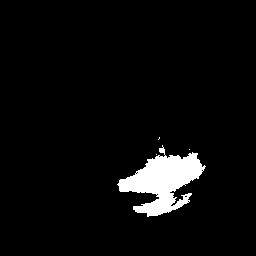

/content/test/1/240.jpg
2441 63095
4


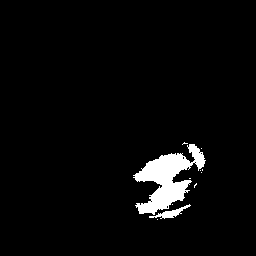

/content/test/1/100.jpg
5198 60338
8


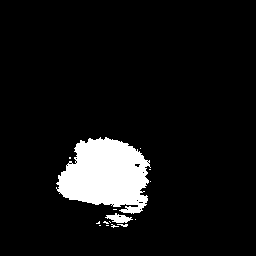

/content/test/1/250.jpg
2788 62748
4


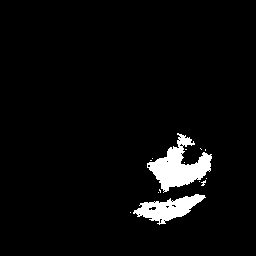

/content/test/1/290.jpg
4584 60952
7


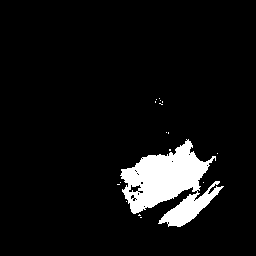

/content/test/1/30.jpg
2783 62753
4


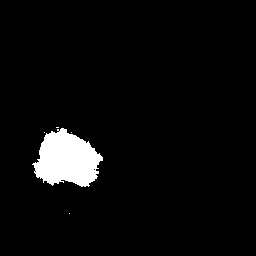

/content/test/1/180.jpg
5406 60130
8


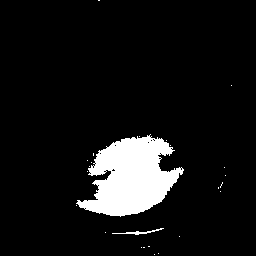

/content/test/1/130.jpg
4298 61238
7


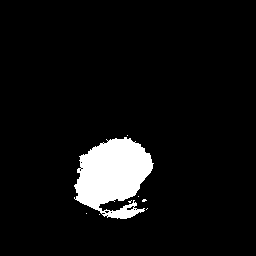

/content/test/1/300.jpg
3463 62073
5


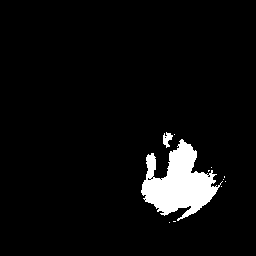

/content/test/1/40.jpg
2501 63035
4


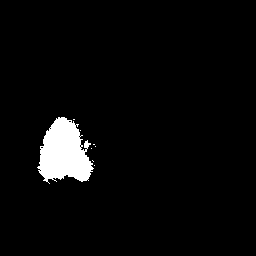

/content/test/1/0.jpg
4176 61360
6


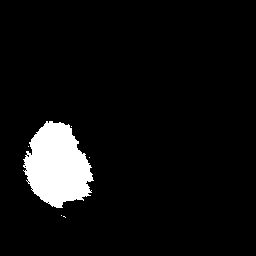

/content/test/1/160.jpg
4660 60876
7


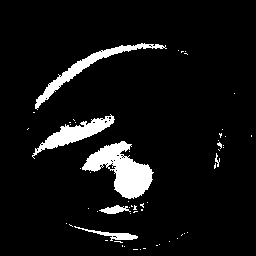

/content/test/1/60.jpg
5338 60198
8


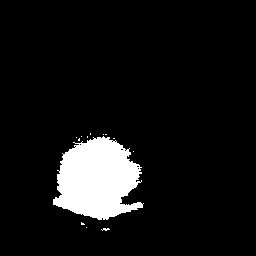

/content/test/1/70.jpg
5676 59860
9


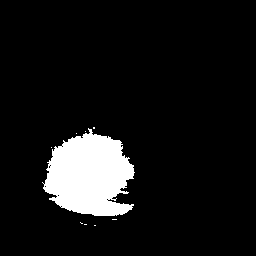

/content/test/1/140.jpg
4289 61247
7


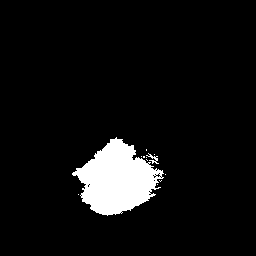

/content/test/1/210.jpg
4206 61330
6


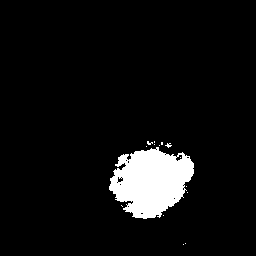

/content/test/1/50.jpg
1111 64425
2


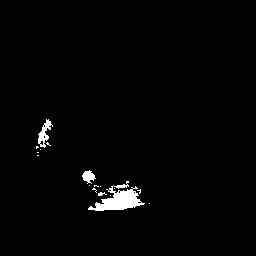

/content/test/1/330.jpg
4182 61354
6


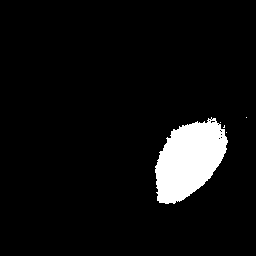

/content/test/1/280.jpg
3590 61946
5


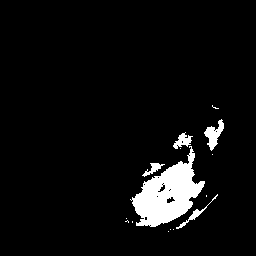

/content/test/1/110.jpg
6282 59254
10


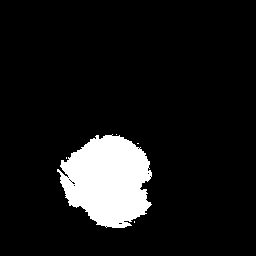

/content/test/1/340.jpg
944 64592
1


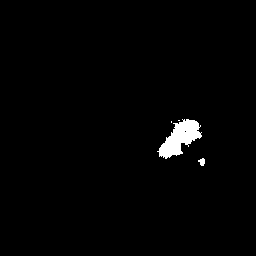

In [ ]:
for dirname, _, filenames in os.walk('/content/test/1'):
    for filename in filenames:
      if '.csv' in filename:
          print('Done!')
      else:
          print(os.path.join(dirname, filename))
          image=cv2.imread(os.path.join(dirname, filename))
          image = cv2.resize(image, (256,256), interpolation= cv2.INTER_LINEAR)
          # convert to HSV and extract saturation channel
          gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

          # threshold
          thresh = cv2.threshold(gray, 175, 255, cv2.THRESH_BINARY)[1]

          # count number of white pixels
          white = np.sum(thresh == 255)
          black = np.sum(thresh == 0)

          cloud_percent = round(white/(white+black) * 100)
          print(str(white)+' '+str(black))
          print(cloud_percent)
          cv2_imshow(thresh)